# Neurosynth decoding

### import modules

In [1]:
import os
import pickle

import numpy as np
import pandas as pd

from scipy import stats
from PIL import Image

from sklearn import preprocessing
from nilearn import image, plotting, input_data 

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline

###  get a list of brain images

In [2]:
imgList = ['../meanTraining/%s'%x for x in os.listdir('../meanTraining/')]; imgList.sort()

### use a 4x4x4 grey matter mask  

so correlations can be computed within reasonable time

The stored mask from a previous notebook is loaded

In [3]:
my_masker = pickle.load( open( "../pickels/my4mm_masker.p", "rb" ) )

In [4]:
my_masker

NiftiMasker(detrend=False, high_pass=None, low_pass=None, mask_args=None,
      mask_img='../rois/gmMap4mm.nii.gz', mask_strategy='background',
      memory=Memory(cachedir=None), memory_level=1, sample_mask=None,
      sessions=None, smoothing_fwhm=None, standardize=False, t_r=None,
      target_affine=None, target_shape=None, verbose=0)

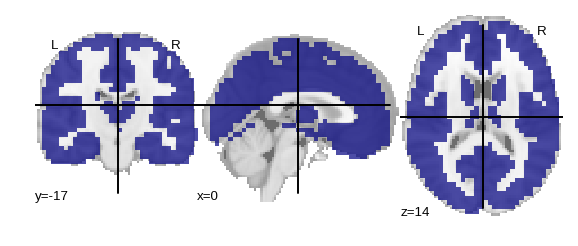

In [5]:
plotting.plot_roi(my_masker.mask_img_);

### extract data from image

In [6]:
def extractMaps(fileName,my_masker):
    thisData = my_masker.transform(fileName)[-1]
    scaleData = preprocessing.scale(np.array(thisData) )
    return scaleData

Example:

In [7]:
thisMap = imgList[-1]

In [8]:
thisMap

'../meanTraining/meanCond_spatial.nii.gz'

In [9]:
scaleMap = extractMaps(thisMap,my_masker)

/data/martin/seminarSS17/venv/lib/python2.7/site-packages/scipy/ndimage/interpolation.py:435: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter will change in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "
/data/martin/seminarSS17/venv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:184: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [10]:
scaleMap

array([-1.243644  , -0.25123593, -0.91716486, ...,  0.8014478 ,
       -0.18955606, -0.5550438 ], dtype=float32)

### load the neurosynth maps, as defined in the previous notebook

In [11]:
nsData = pd.read_csv('../arrays/ns_4mm_database.csv',index_col=[0,1])

In [12]:
nsData.shape

(602, 18744)

In [13]:
nsData.tail()

0         1         2         3         4         5  \
  Unnamed: 1                                                               
7 verbal     -0.096669 -0.096669 -0.096669 -0.096669 -0.096669 -0.096669   
  verbs      -0.143120 -0.143120 -0.143120 -0.143120  7.498145  7.815414   
  word       -0.238959 -0.238959 -0.238959 -0.238959  4.465387  4.689173   
  words      -0.268781 -0.268781 -0.268781 -0.268781  3.830119  4.113190   
  written    -0.133325 -0.133325 -0.133325 -0.133325 -0.133325 -0.133325   

                     6         7         8         9    ...        18734  \
  Unnamed: 1                                            ...                
7 verbal     -0.096669 -0.096669 -0.096669 -0.096669    ...    -0.096669   
  verbs       7.668591  7.714716  7.300322 -0.143120    ...    -0.143120   
  word        4.569203  4.486181 -0.238959 -0.238959    ...    -0.238959   
  words       4.155813  4.230690 -0.268781 -0.268781    ...    -0.268781   
  written    -0.133325 -0.133325 -0.133325 -0.133325    ...    -0.133325   

                 18735     18736     18737     18738     18739     18740  \
  Unnamed: 1                                                               
7 verbal     -0.096669 -0.096669 -0.096669 -0.096669 -0.096669 -0.096669   
  verbs      -0.143120 -0.143120 -0.143120 -0.143120 -0.143120 -0.143120   
  word       -0.238959 -0.238959 -0.238959 -0.238959 -0.238959 -0.238959   
  words      -0.268781 -0.268781 -0.268781 -0.268781 -0.268781 -0.268781   
  written    -0.133325 -0.133325 -0.133325 -0.133325 -0.133325 -0.133325   

                 18741     18742     18743  
  Unnamed: 1                                
7 verbal     -0.096669 -0.096669 -0.096669  
  verbs      -0.143120 -0.143120 -0.143120  
  word       -0.238959 -0.238959 -0.238959  
  words      -0.268781 -0.268781 -0.268781  
  written    -0.133325 -0.133325 -0.133325  

[5 rows x 18744 columns]

In [14]:
clusterNames =  pickle.load( open( "../pickels/clusterDict.p", "rb" ) )

In [15]:
clusterNames

{'0': 'default',
 '1': 'motor',
 '2': 'reward',
 '3': 'auditory',
 '4': 'emotion',
 '5': 'spatial',
 '6': 'objects',
 '7': 'language'}

## Correlate one block with the 602 neurosynth maps

In [16]:
thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]

In [17]:
thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr']).T

In [18]:
thisCorrDf

0                                                 \
Unnamed: 1 angular angular gyrus anterior medial autobiographical   
corr         0.066      0.061154        0.004215         0.006408   

                                                                      \
Unnamed: 1 autobiographical memory   belief   beliefs cognitive task   
corr                      0.026203 -0.00714 -0.022281       0.019267   

                                  ...            7                      \
Unnamed: 1  coherent component    ...    sentences  speakers syntactic   
corr        0.014847 -0.017907    ...    -0.056615 -0.026458 -0.054096   

                                                                             \
Unnamed: 1 temporal cortex      verb    verbal    verbs      word     words   
corr             -0.045907 -0.064263 -0.011988 -0.05986 -0.066313 -0.063649   

                      
Unnamed: 1   written  
corr       -0.036313  

[1 rows x 602 columns]

### sort by strenght of correlation

In [19]:
def getTop(corrDf):
    sortDf = corrDf.copy()
    sortDf = sortDf.T.sort_values(by=sortDf.index[-1],ascending=False)
    topDf = pd.concat([sortDf[:5],sortDf[-5:]],axis=0)
    topDf.columns = ['correlation']
    topDf = topDf.round(2)
    return topDf

In [20]:
topDf = getTop(thisCorrDf)

Example: Top 5 highest and top 5 lowest correlations

In [21]:
topDf

correlation
  Unnamed: 1                       
5 spatial                      0.22
  parietal                     0.19
  superior parietal            0.18
  intraparietal sulcus         0.15
  intraparietal                0.15
7 word                        -0.07
  language                    -0.07
2 orbitofrontal cortex        -0.07
  orbitofrontal               -0.07
7 reading                     -0.08

## Grouping of neurosynth maps

This works by loading all the stored data from the previous notebook

In [22]:
# we load the data from the previous notebook
dissDf = pd.read_csv('../arrays/dissDf.csv',index_col=[0])
mdsPositions = np.array(pd.read_csv('../arrays/mdsDf.csv',index_col=[0]))
mdsDf = pd.DataFrame(mdsPositions,index=dissDf.index)

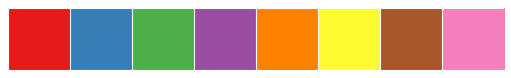

In [23]:
myPalette = sns.color_palette('Set1',n_colors=8)
sns.palplot(myPalette)

In [24]:
mdsDf = pd.read_csv('../arrays/mdsDf.csv',index_col=[0])
kDf = pd.read_csv('../arrays/kDf.csv',index_col=[0])

Functions to make plots more readable

In [25]:
def findNeighbors(mdsDf,p,added,notCloserThan=50):
    
    # coordinates of this keyword
    thisDf = mdsDf.loc[p]
    
    # coordinates of all other keywords
    otherDf = mdsDf.drop(p)
    
    # lenghts of adjacent and opposite
    diffDf = abs(thisDf-otherDf)
    
    # lengths of hypoteneuse
    distanceDf = np.sqrt(diffDf**2).sum(axis=1)
    
    # check if there are close distances
    closeEncounters = distanceDf[distanceDf<notCloserThan].index
    
    # check if the close ones have already been labelled
    for entry in closeEncounters:
        if entry in added:
            return True
    
    return False

In [26]:
sns.set_style('white')
sns.set_context('poster')

In [27]:
def plotSpace(mdsDf,kDf,clusterNames,myPalette,closest,ax):

    kPredictions = list(kDf['n'])
    # loop both trough the positions and the predictions
    for p,l in zip(mdsDf.index,kPredictions):
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=12,alpha=0.8
               )

    added = []
    mdsDf = mdsDf.sort_values(by='1')
    # sorting by the x-dimension will fill the labels from right to left side
    mdsDf = mdsDf.sort_values(by='0',ascending=False)
    for p,x,y in zip(mdsDf.index,mdsDf['0'], mdsDf['1']):
        l = kDf.loc[p]
        if not findNeighbors(mdsDf,p,added,notCloserThan=closest):
            ax.annotate(p, xy = (x, y),fontsize=16,alpha=0.8)
            added.append(p)
            
    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    ax.legend(loc='lower left',bbox_to_anchor=(0.,0))
    return ax

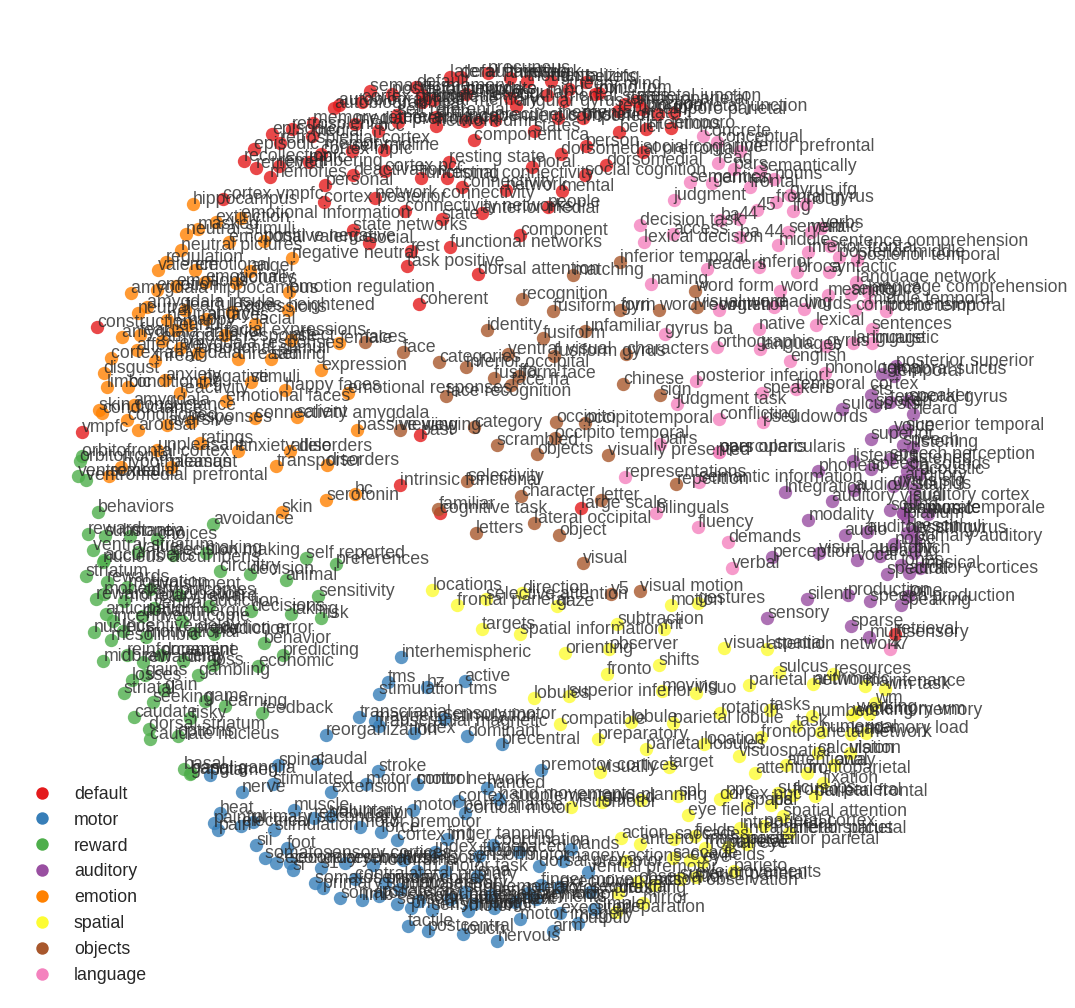

In [28]:
fig,ax = plt.subplots(1,1,figsize=(16,16))
ax = plotSpace(mdsDf,kDf,clusterNames,myPalette,0,ax)
#plt.savefig('../figs/nsBallSparse.png',dpi=300)
plt.show()

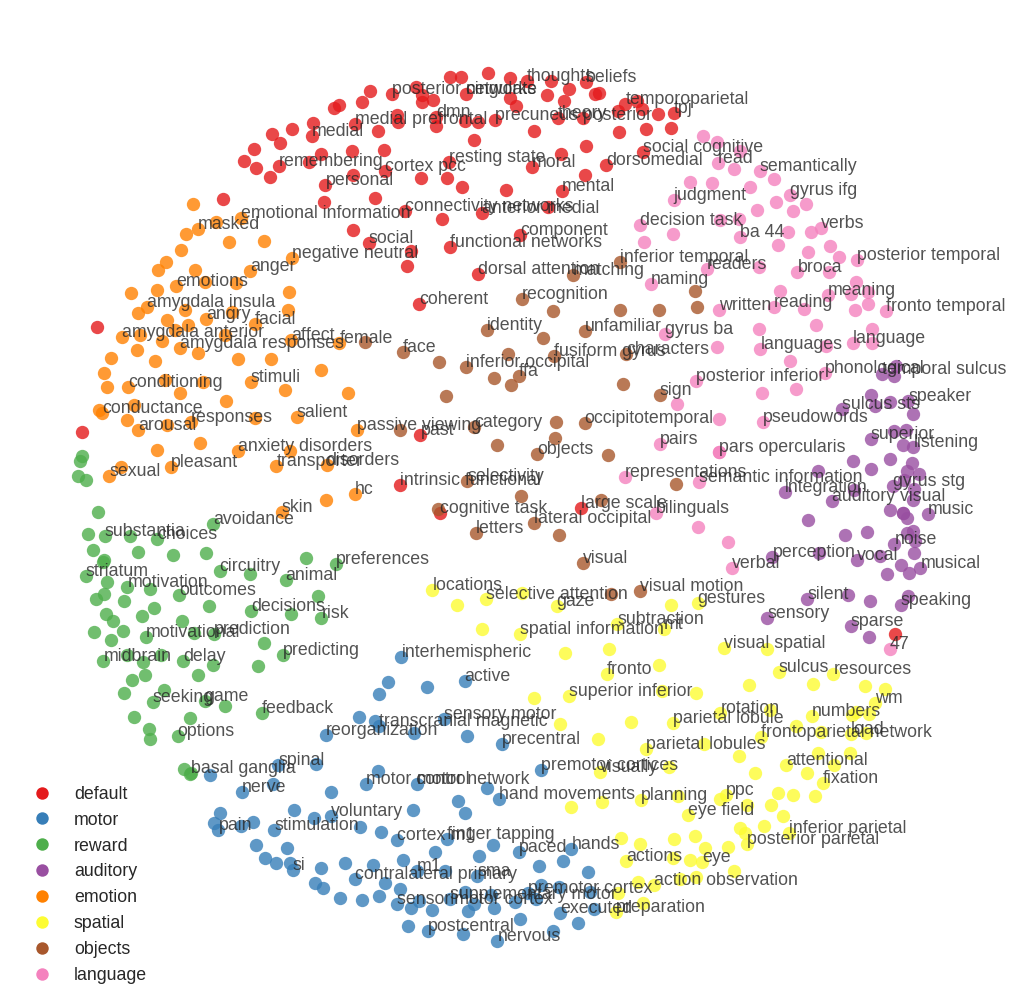

In [29]:
fig,ax = plt.subplots(1,1,figsize=(16,16))
ax = plotSpace(mdsDf,kDf,clusterNames,myPalette,50,ax)
#plt.savefig('../figs/fig1_nsBallSparse.png',dpi=300)
plt.show()

## Part II - projecting correlations with our data onto the neurosynth space

Min-Max scaling of correlations, to make their size predictable for plotting

In [30]:
def makeMinMax(corrDf):
    minMaxDf = pd.DataFrame( preprocessing.minmax_scale(corrDf,axis=1),
                            index=corrDf.index,
                            columns=corrDf.columns )
    return minMaxDf.T

In [31]:
minMaxDf = makeMinMax(thisCorrDf)

In [32]:
thisCorrDf

0                                                 \
Unnamed: 1 angular angular gyrus anterior medial autobiographical   
corr         0.066      0.061154        0.004215         0.006408   

                                                                      \
Unnamed: 1 autobiographical memory   belief   beliefs cognitive task   
corr                      0.026203 -0.00714 -0.022281       0.019267   

                                  ...            7                      \
Unnamed: 1  coherent component    ...    sentences  speakers syntactic   
corr        0.014847 -0.017907    ...    -0.056615 -0.026458 -0.054096   

                                                                             \
Unnamed: 1 temporal cortex      verb    verbal    verbs      word     words   
corr             -0.045907 -0.064263 -0.011988 -0.05986 -0.066313 -0.063649   

                      
Unnamed: 1   written  
corr       -0.036313  

[1 rows x 602 columns]

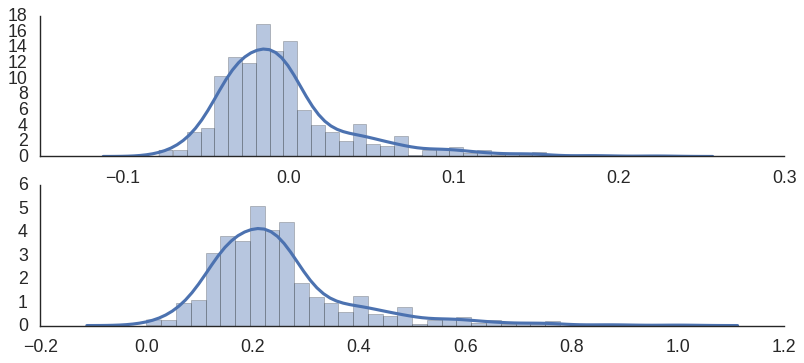

In [33]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,5))
sns.distplot(thisCorrDf.T,ax=ax1)
sns.distplot(minMaxDf,ax=ax2)
sns.despine()
plt.show()

Using size of dots and text and transparency of text to indicate size of correlations. Plus, we cheat a little bit for plotting to make the figure readable, so that differences in size if correlation are much more extreme than they appear.

In [34]:
def plotFullCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,ax):

    kPredictions = list(kDf['n'])
    # loop both trough the positions and the predictions
    for p,l in zip(mdsDf.index,kPredictions):
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=minMaxDf.ix[l].ix[p]**3*50,
                      alpha=0.7
               )

    for p,l,x,y in zip(mdsDf.index,kPredictions, mdsDf['0'], mdsDf['1']):
        ax.annotate(p, xy = (x, y),
                    fontsize=minMaxDf.ix[l].ix[p]**3*50,
                    alpha=minMaxDf.ix[l].ix[p]**10)

            
    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    #ax.legend(loc='lower left',bbox_to_anchor=(1.5,0))
    return ax

In [35]:
def plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,closest,ax):

    # loop both trough the positions and the predictions
    for p in mdsDf.index:
        l = kDf['n'].loc[p]
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=2+minMaxDf.ix[l].ix[p]**3*50,
                      alpha=0.7
               )

    # to not omit the most important keywords, we move through the list by the order in minMaxDf
    sortedIndex = minMaxDf.sort_values('corr',ascending=False).index.labels[1]
    sortedNames = [minMaxDf.index.levels[1][x] for x in sortedIndex ]
    print sortedNames[:10]
    added = []
    for p in sortedNames:
        l = kDf['n'].loc[p]
        x = mdsDf['0'].loc[p]
        y = mdsDf['1'].loc[p]

        if not findNeighbors(mdsDf,p,added,notCloserThan=closest):

            thisVal = minMaxDf.ix[l].ix[p].values[-1]
            
            thisP = p.split()
            
            for i,j in enumerate(thisP):
            
                ax.annotate(j, xy = (x, y-1.3*(i*(thisVal**3*40))  ),
                        fontsize=thisVal**3*40,
                        alpha=thisVal**7)
            added.append(p)

    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    #ax.legend(loc='lower left',bbox_to_anchor=(1.5,0))
    return ax

Examples of different distances required to plot keywords:

In [36]:
thisMap = imgList[-1]
scaleMap = extractMaps(thisMap,my_masker)
thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]
thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr']).T*-1
minMaxDf = makeMinMax(thisCorrDf)

['reading', 'orbitofrontal', 'orbitofrontal cortex', 'language', 'word', 'verb', 'words', 'lexical', 'medial prefrontal', 'verbs']


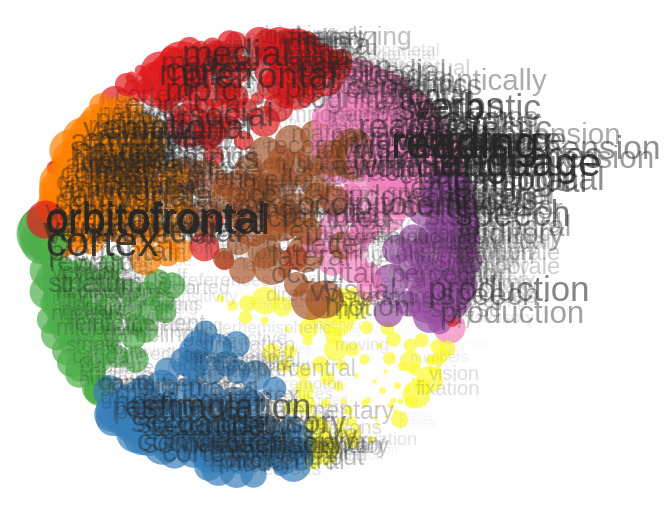

In [37]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,0,ax)
plt.show()

['reading', 'orbitofrontal', 'orbitofrontal cortex', 'language', 'word', 'verb', 'words', 'lexical', 'medial prefrontal', 'verbs']


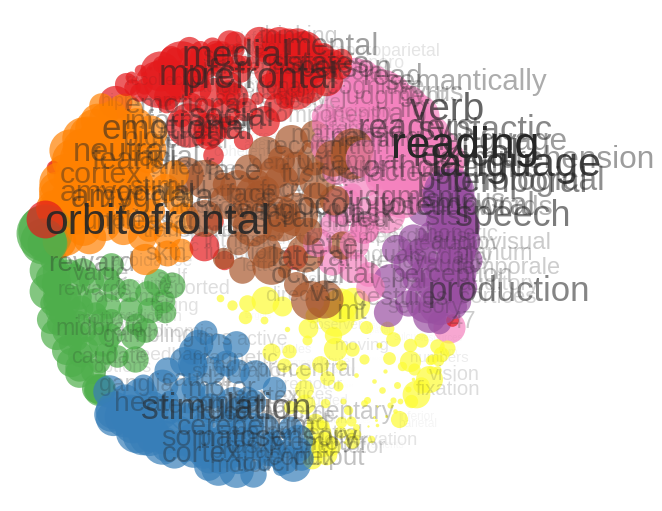

In [38]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,50,ax)
plt.show()

['reading', 'orbitofrontal', 'orbitofrontal cortex', 'language', 'word', 'verb', 'words', 'lexical', 'medial prefrontal', 'verbs']


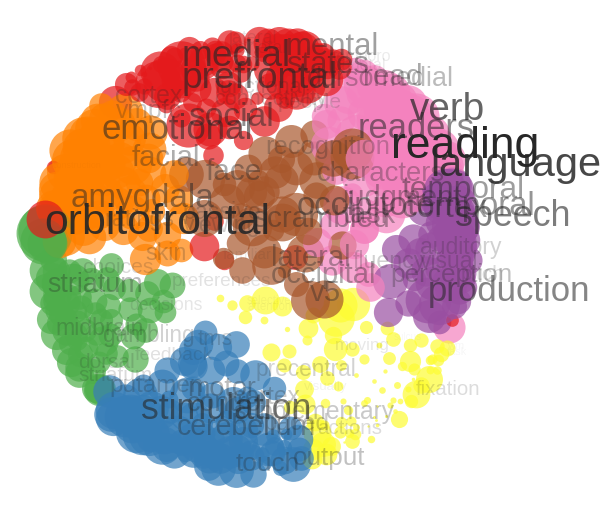

In [39]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,100,ax)
plt.show()

### settings to plot average training data

In [40]:
def makeMeanMindSpace(thisMap,closest=100,
                  my_masker=my_masker,nsData=nsData,mdsDf=mdsDf,kDf=kDf,
                  myPalette=myPalette,clusterNames=clusterNames):

    scaleMap = extractMaps(thisMap,my_masker)

    thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]
    
    thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr']).T
    
    minMaxDf = makeMinMax(thisCorrDf)

    fig,ax = plt.subplots(1,1,figsize=(8,8))
    
    plotMeanCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,closest,ax)
    
    fullName = thisMap.split('/')[-1].split('.')[0]
    nam = fullName.split('_')[-1]
    plt.title(nam,fontsize=32)
    
    plt.savefig('../nsFigs/synth_%s.png'%fullName,bbox_inches='tight',dpi=300)
    plt.show()

### sanity checks 

Here, we feed some of the neurosynth maps back into the space. They must correlate with themselves the highest, otherwise we did something wrong.

['faces', 'face', 'fusiform face', 'ffa', 'face ffa', 'fusiform', 'fusiform gyrus', 'facial', 'face recognition', 'fearful']


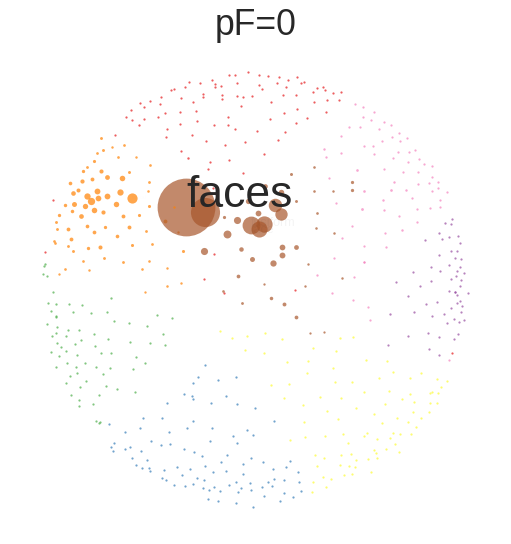

In [41]:
makeMeanMindSpace('../nsMaps/faces_pFgA_pF=0.50_FDR_0.01.nii.gz')

['ba 44', 'ba', '44', '45', 'broca', 'frontal gyrus', 'syntactic', 'inferior frontal', 'inferior', 'ifg']


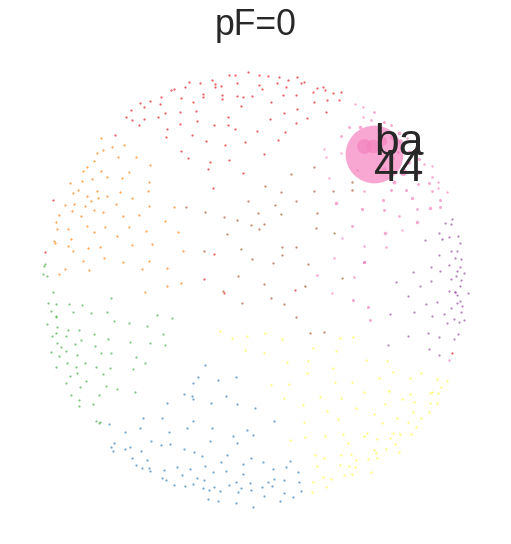

In [42]:
makeMeanMindSpace('../nsMaps/ba 44_pFgA_pF=0.50_FDR_0.01.nii.gz')

"magnetic resonance" is a term we discarded before creating the space. So this is one example of a neurosynth term which will not correlate the strongest with itself:

['limb', 'stimulated', 'speaking', 'person', 'supplementary motor', 'supplementary', 'mental state', 'parietal junction', 'junction', 'connectivity networks']


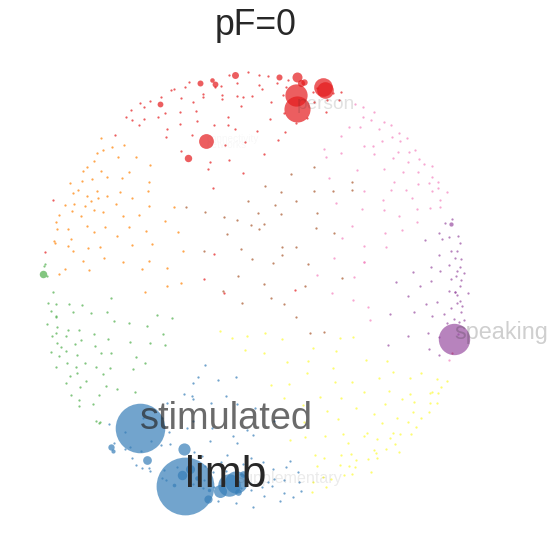

In [43]:
makeMeanMindSpace('../nsMaps/magnetic resonance_pFgA_pF=0.50_FDR_0.01.nii.gz')

### decoding of mean activity in training data

['frontal', 'resting state', 'pcc', 'demands', 'posterior cingulate', 'working memory', 'working', 'cortex pcc', 'retrieval', 'default']


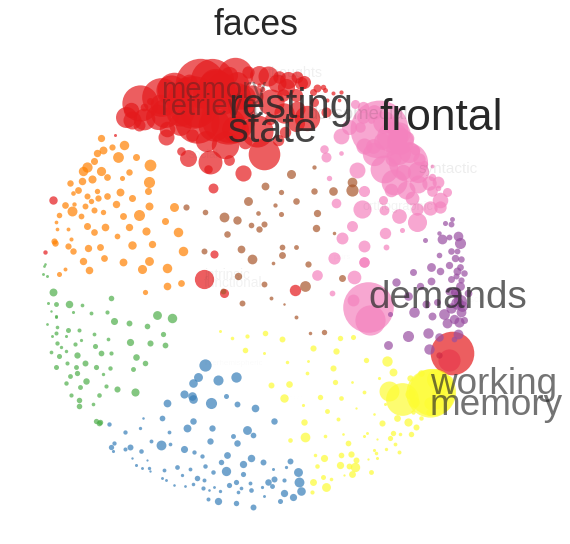

['reading', 'words', 'language', 'word', 'lexical', 'phonological', 'semantic', 'verbs', 'verb', 'inferior frontal']


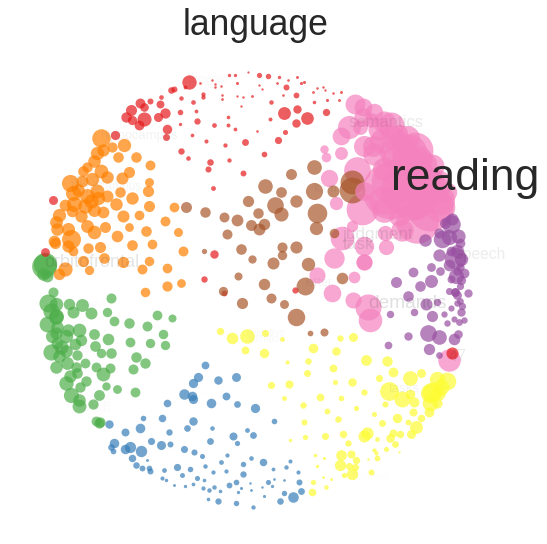

['motor', 'movements', 'premotor', 'movement', 'somatosensory', 'hand', 'motor imagery', 'finger', 'execution', 'sensorimotor']


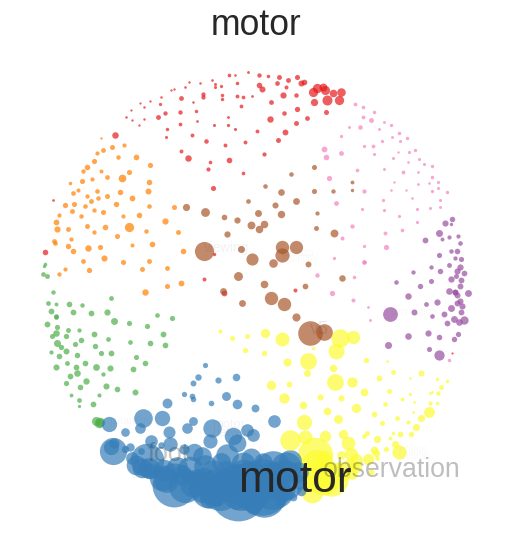

['theory mind', 'temporo parietal', 'mind', 'beliefs', 'mind tom', 'mentalizing', 'parietal junction', 'tom', 'mode network', 'ventromedial']


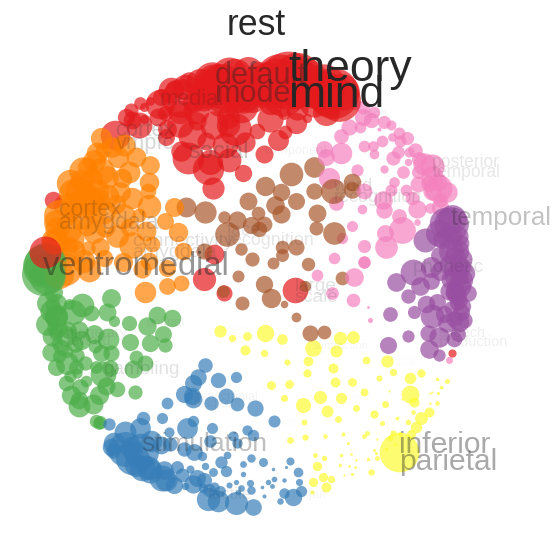

['spatial', 'parietal', 'superior parietal', 'intraparietal sulcus', 'intraparietal', 'parietal cortex', 'retrosplenial', 'calculation', 'posterior parietal', 'precuneus']


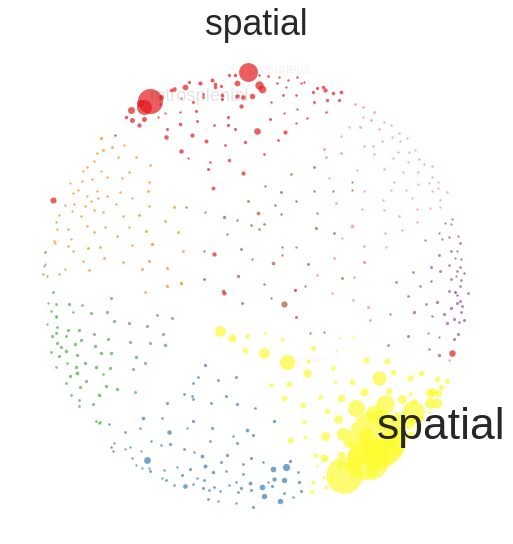

In [44]:
for im in ['../meanTraining/%s'%x for x in os.listdir('../meanTraining/')]:
    makeMeanMindSpace(im,closest=150)

### For single blocks

Because single blocks are more messy and we need to plot 25 of them in one figure, only the very highest correlations are labeled.

In [45]:
def plotCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,ax):

    # loop both trough the positions and the predictions
    for p in mdsDf.index:
        l = kDf['n'].loc[p]
        # show predictions from raw data on mds scaled data, the predictions are indicated by the color
        ax.plot( mdsDf.ix[p]['0'],
                     mdsDf.ix[p]['1'],
                     'o',color=myPalette[l],
                      markersize=minMaxDf.ix[l].ix[p]**3*50,
                      alpha=0.7
               )

    # to not omit the most important keywords, we move through the list by the order in minMaxDf
    sortedIndex = minMaxDf.sort_values('corr',ascending=False).index.labels[1]
    sortedNames = [minMaxDf.index.levels[1][x] for x in sortedIndex ]
        
    added = []
    counter = 5
    for p in sortedNames:
        l = kDf['n'].loc[p]
        x = mdsDf['0'].loc[p]
        y = mdsDf['1'].loc[p]

        if counter > 0:
            if not findNeighbors(mdsDf,p,added,notCloserThan=200):
                thisVal = minMaxDf.ix[l].ix[p]
                thisP = p.split()
                for i,j in enumerate(thisP):
                    ax.annotate(j, xy = (x, y-1.3*(i*(thisVal**3*70))),
                            fontsize=thisVal**3*70,
                            alpha=thisVal**30*5)
                added.append(p)
                
                counter-=1

    # dummy plot for labelling
    for l in np.unique(kDf['n']):
        ax.plot([],'o',color=myPalette[l],label=clusterNames[str(l)])
    
    # show the plot
    sns.despine(left=True,bottom=True)
    ax.set_xticks([]);ax.set_yticks([])
    #ax.legend(loc='lower left',bbox_to_anchor=(1.5,0))
    return ax

In [46]:
def makeMindSpace(thisMap,
                  my_masker=my_masker,nsData=nsData,mdsDf=mdsDf,kDf=kDf,
                  myPalette=myPalette,clusterNames=clusterNames,myEval=''):

    scaleMap = extractMaps(thisMap,my_masker)

    thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]
    
    thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr']).T
    
    minMaxDf = makeMinMax(thisCorrDf)

    fig,ax = plt.subplots(1,1,figsize=(8,8))
    
    plotCorr(mdsDf,kDf,minMaxDf,myPalette,clusterNames,ax)
    
    fullName = thisMap.split('/')[-1].split('.')[0]
    con = fullName.split('_')[0]
    nam = fullName.split('_')[-1]
    num = fullName.split('_')[1]
    plt.title('%s\n%s %s%s' % (con,num,nam,myEval),fontsize=72,y=1.06)
    
    plt.savefig('../nsFigs/synth_%s.png'%fullName,bbox_inches='tight',dpi=300)
    plt.show()

In [47]:
def sortBlocks(blocks):
    d = {}
    for i in blocks:
        num = i.split('/')[-1].split('.')[0]
        d[num] = i
    sortRunDf = pd.DataFrame(d,index=['filename']).T
    sortRunDf.sort_index(inplace=True)
    return sortRunDf

### loop through all test blocks

In [48]:
imgList = ['../test/%s'%x for x in os.listdir('../test/')]; imgList.sort()

In [49]:
sortRunDf = sortBlocks(imgList)

In [50]:
sortRunDf

filename
faces_051_movieactors    ../test/faces_051_movieactors.nii.gz
faces_058_athletes          ../test/faces_058_athletes.nii.gz
faces_064_family              ../test/faces_064_family.nii.gz
faces_067_friends            ../test/faces_067_friends.nii.gz
faces_074_politicians    ../test/faces_074_politicians.nii.gz
language_052_countries  ../test/language_052_countries.nii.gz
language_056_animals      ../test/language_056_animals.nii.gz
language_062_animals      ../test/language_062_animals.nii.gz
language_066_tools          ../test/language_066_tools.nii.gz
language_073_fruit          ../test/language_073_fruit.nii.gz
motor_055_badminton        ../test/motor_055_badminton.nii.gz
motor_060_swimming          ../test/motor_060_swimming.nii.gz
motor_065_badminton        ../test/motor_065_badminton.nii.gz
motor_070_tennis              ../test/motor_070_tennis.nii.gz
motor_075_climbing          ../test/motor_075_climbing.nii.gz
rest_053_rest                    ../test/rest_053_rest.nii.gz
rest_057_rest                    ../test/rest_057_rest.nii.gz
rest_061_rest                    ../test/rest_061_rest.nii.gz
rest_069_rest                    ../test/rest_069_rest.nii.gz
rest_072_rest                    ../test/rest_072_rest.nii.gz
spatial_054_market          ../test/spatial_054_market.nii.gz
spatial_059_school          ../test/spatial_059_school.nii.gz
spatial_063_citysquare  ../test/spatial_063_citysquare.nii.gz
spatial_068_market          ../test/spatial_068_market.nii.gz
spatial_071_church          ../test/spatial_071_church.nii.gz

### get the top correlations

In [51]:
def findMaxCorr(sortRunDf,my_masker=my_masker,nsData=nsData,clusterNames=clusterNames):
    
    d = {}

    for i in sortRunDf.index:
        thisMap = sortRunDf.loc[i]['filename']
        scaleMap = extractMaps(thisMap,my_masker)
        thisCorr = np.corrcoef(scaleMap,nsData)[0,:][1:]
        thisCorrDf = pd.DataFrame(thisCorr,index=nsData.index,columns=['corr'])

        # get cluster name corresponding to keyword
        winNum = thisCorrDf.idxmax().values[-1][0]
        winName = clusterNames[str(winNum)]

        d[i] = winName

    df = pd.DataFrame(d,index=['win']).T
    
    return df

### evaluate if the cluster of the top correlation is the cluster of the block

In [52]:
def checkMatch(df):

    copyDf = df.copy()
    
    for i in copyDf.index:
        
        thisWin = copyDf.loc[i]['win']
        
        if 'faces' in i and thisWin=='objects':
            thisEval = True
        elif 'motor' in i and thisWin=='motor':
            thisEval = True
        elif 'spatial' in i and thisWin=='spatial':
            thisEval = True
        elif 'rest' in i and thisWin=='default':
            thisEval = True
        elif 'language' in i and thisWin=='language':
            thisEval = True
        else:
            thisEval = False

        copyDf.set_value(i,'eval',thisEval)
        
    return copyDf

### results of pure neurosynth decoding

In [53]:
decodeDf = checkMatch(findMaxCorr(sortRunDf))

/data/martin/seminarSS17/venv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [54]:
decodeDf

win   eval
faces_051_movieactors    emotion  False
faces_058_athletes        reward  False
faces_064_family          reward  False
faces_067_friends        default  False
faces_074_politicians    objects   True
language_052_countries   objects  False
language_056_animals     spatial  False
language_062_animals      reward  False
language_066_tools      language   True
language_073_fruit      language   True
motor_055_badminton        motor   True
motor_060_swimming         motor   True
motor_065_badminton        motor   True
motor_070_tennis           motor   True
motor_075_climbing         motor   True
rest_053_rest            default   True
rest_057_rest              motor  False
rest_061_rest            default   True
rest_069_rest            default   True
rest_072_rest            default   True
spatial_054_market       spatial   True
spatial_059_school       spatial   True
spatial_063_citysquare   default  False
spatial_068_market       spatial   True
spatial_071_church       default  False

In [55]:
print "based on the neurosynth decoding, we can reach %.0f%% correct predictions." % (decodeDf['eval'].mean()*100)

based on the neurosynth decoding, we can reach 60% correct predictions.


Binomial test

In [56]:
thisN = decodeDf.shape[0]
numHits = decodeDf['eval'].mean()*thisN
print numHits,thisN

15.0 25


In [57]:
print 'p=%.6f' % stats.binom_test( numHits,n=thisN,p=1./5)
print stats.binom_test( numHits,n=thisN,p=1./5)

p=0.000014
1.3564842218639032e-05


### show prediction in neurosynth space

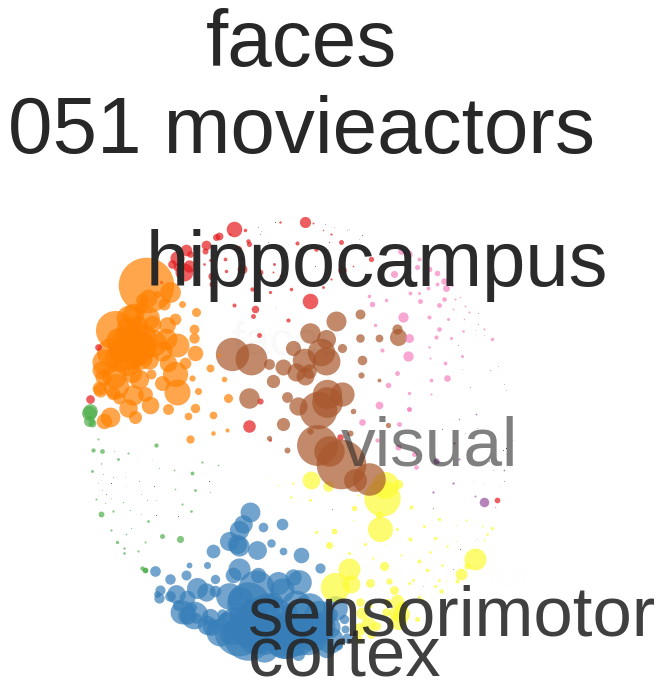

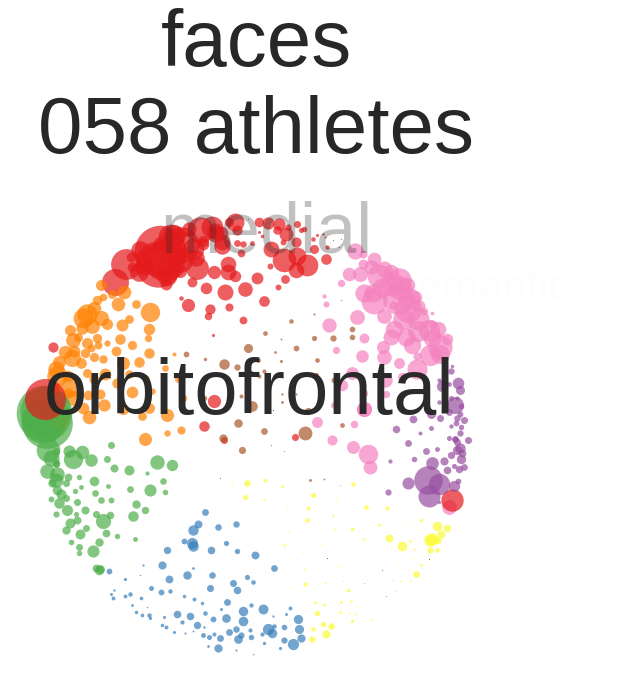

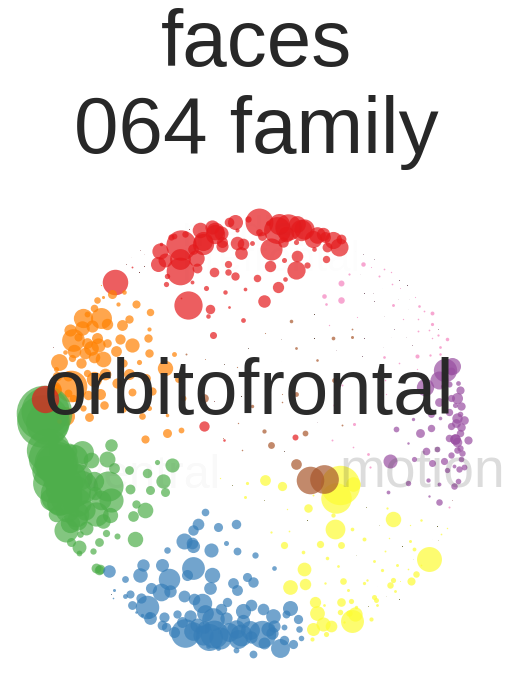

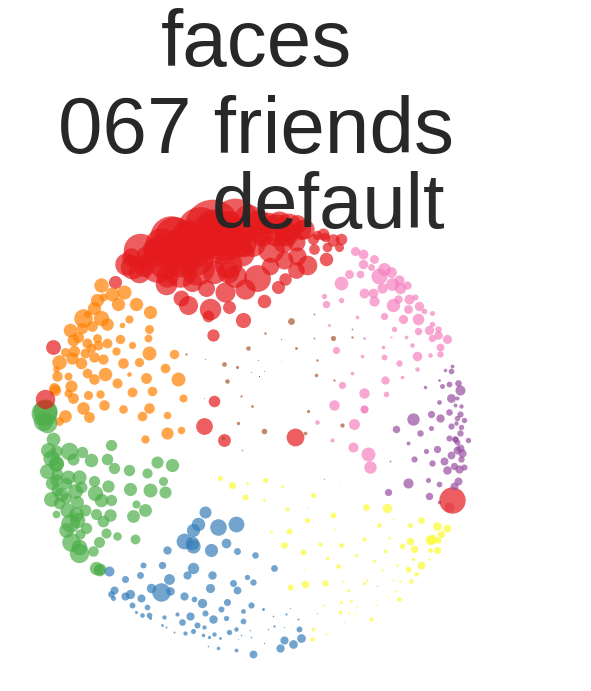

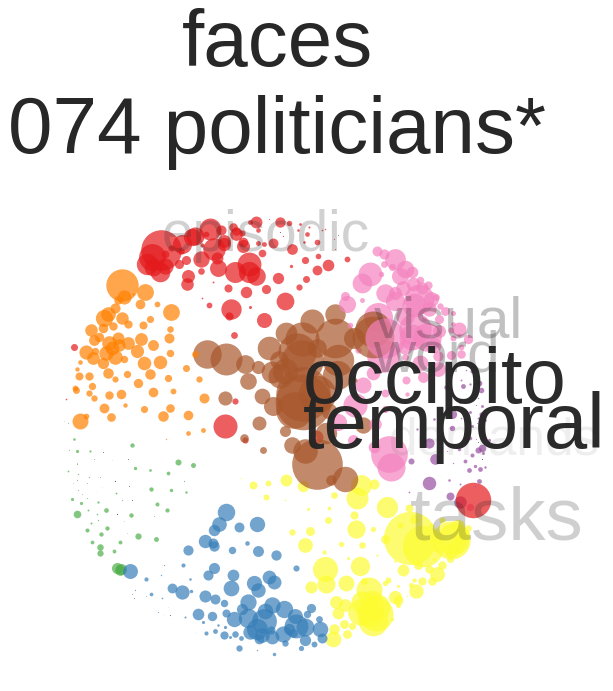

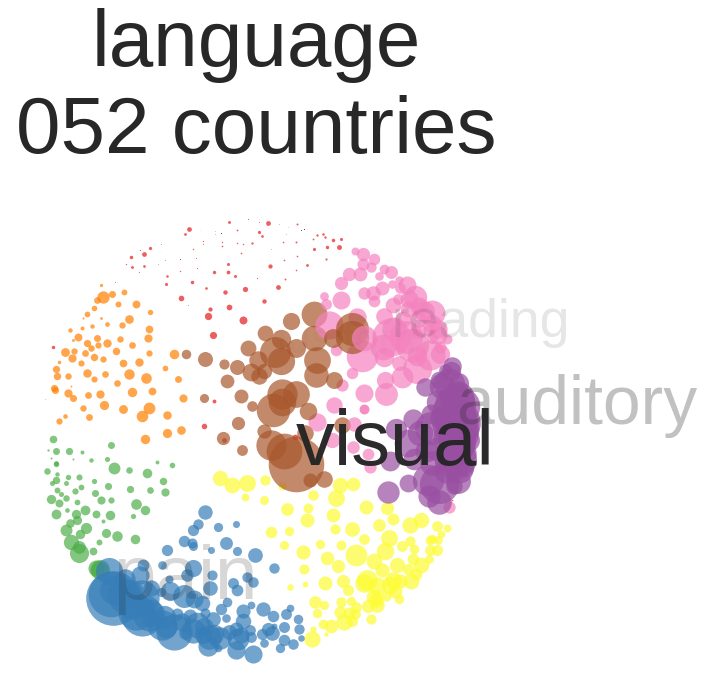

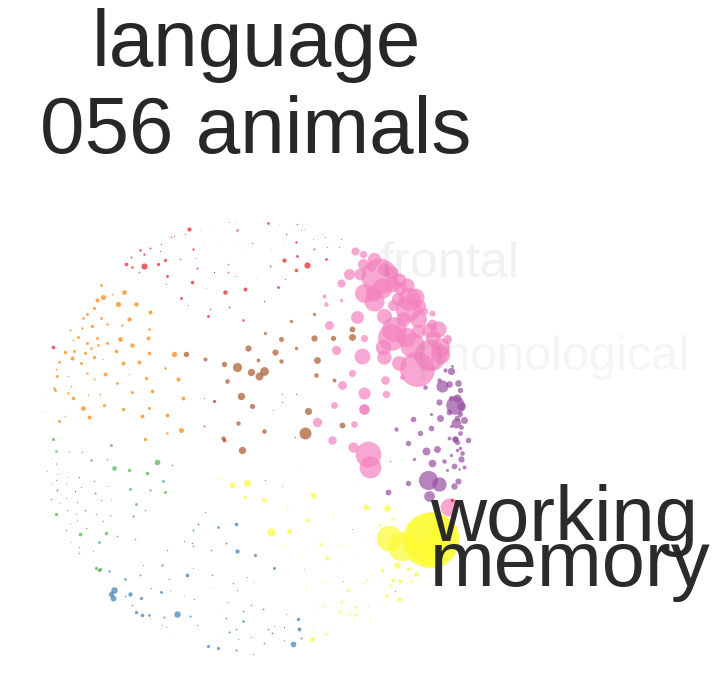

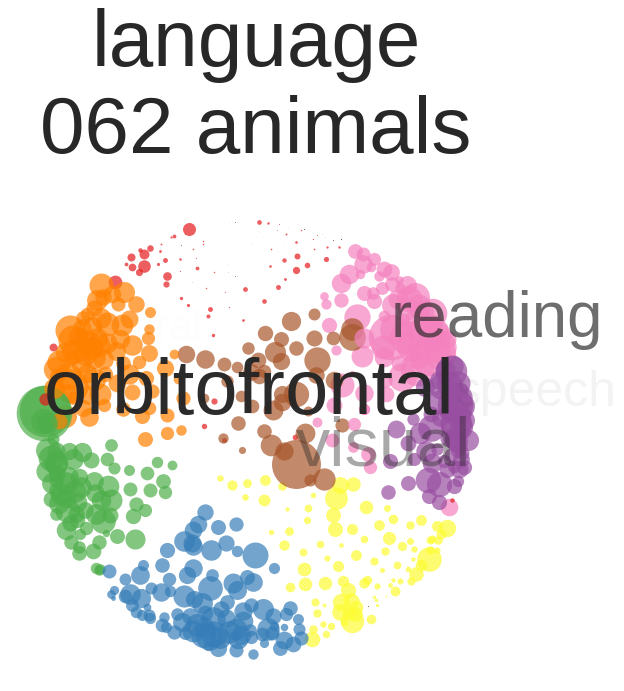

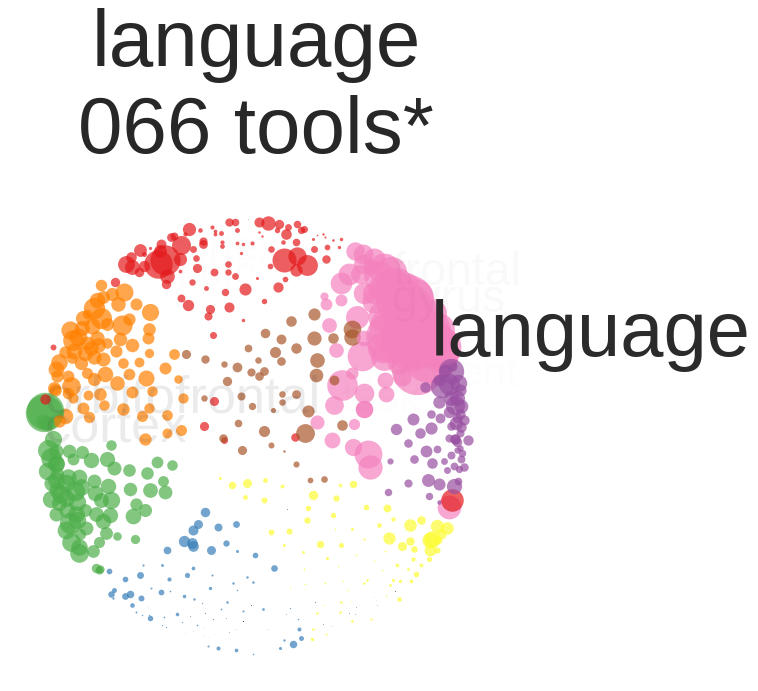

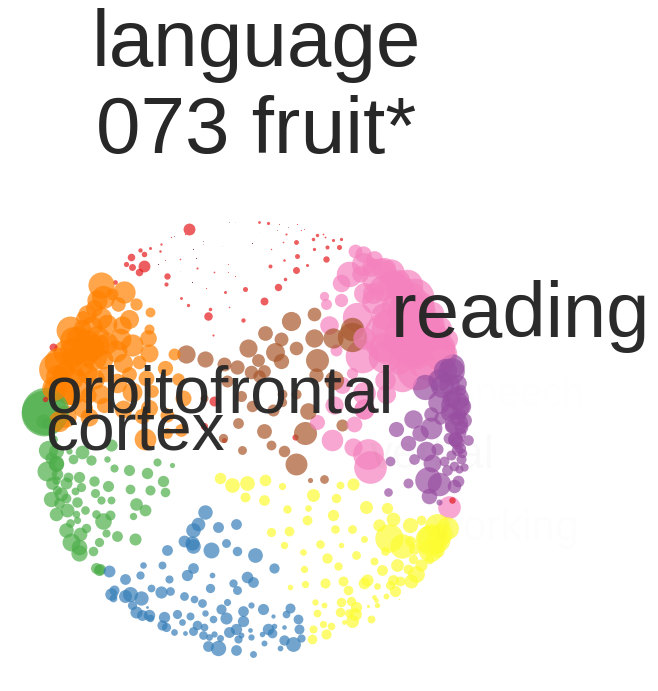

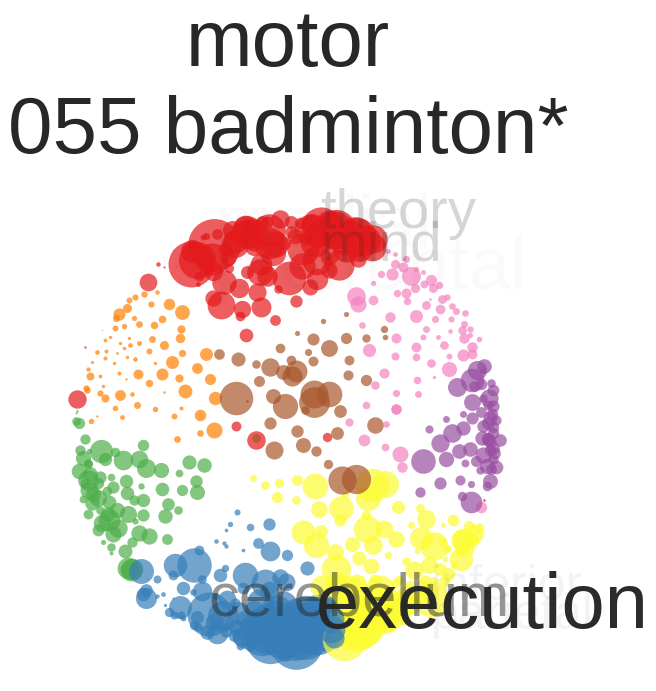

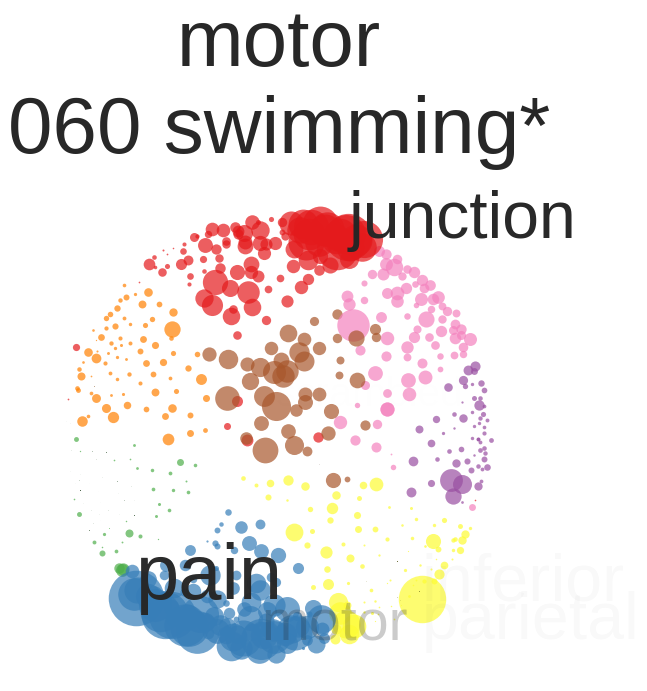

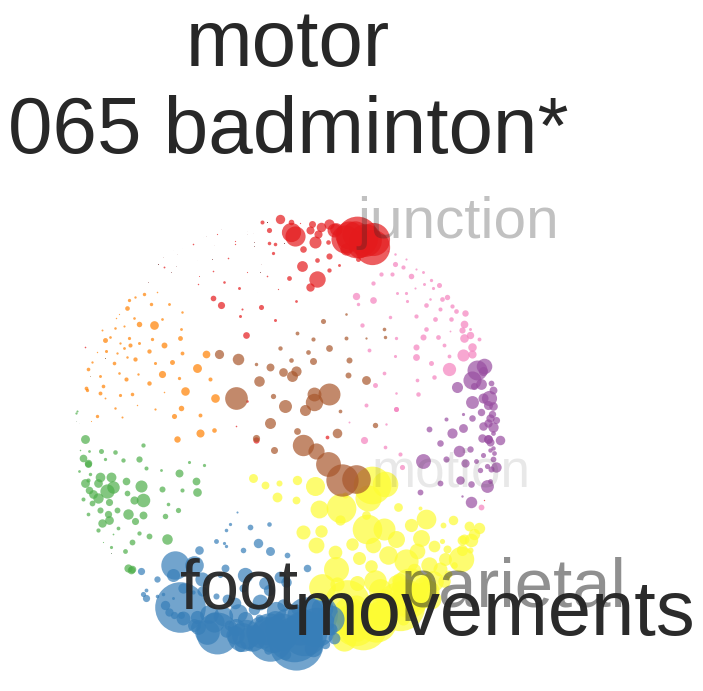

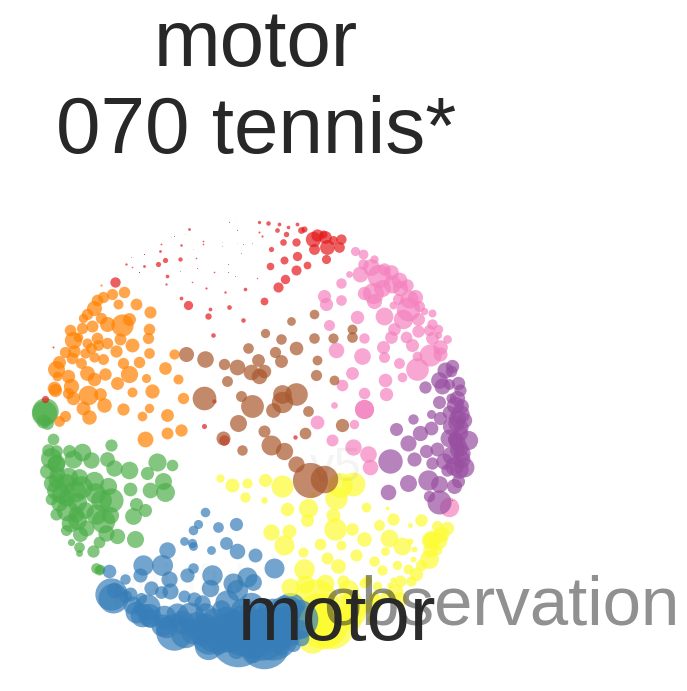

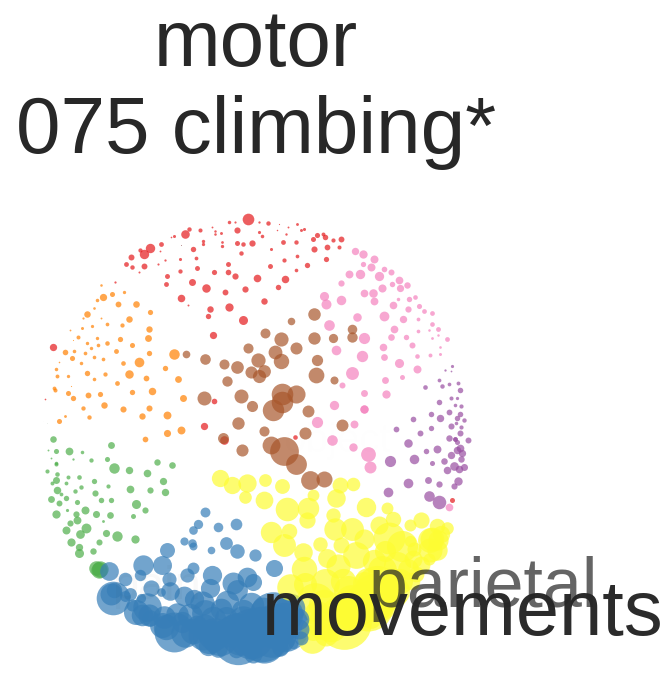

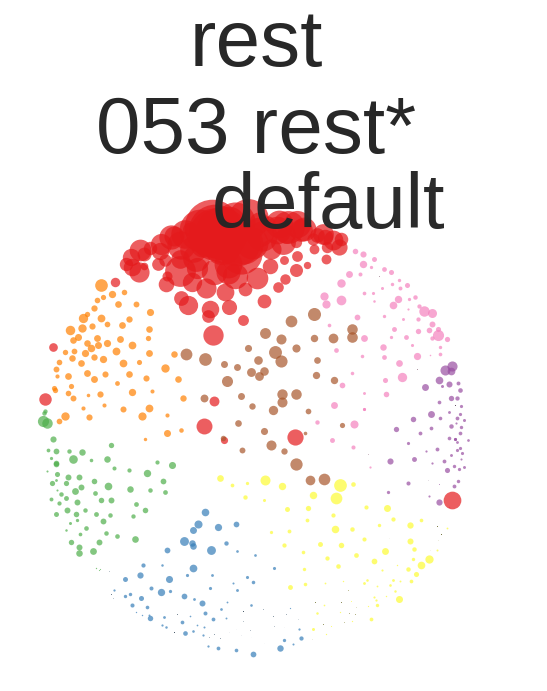

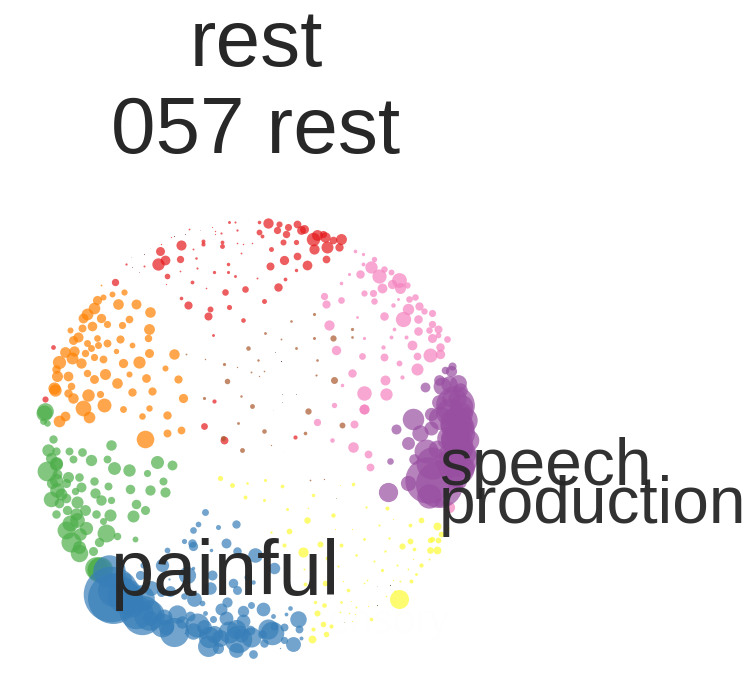

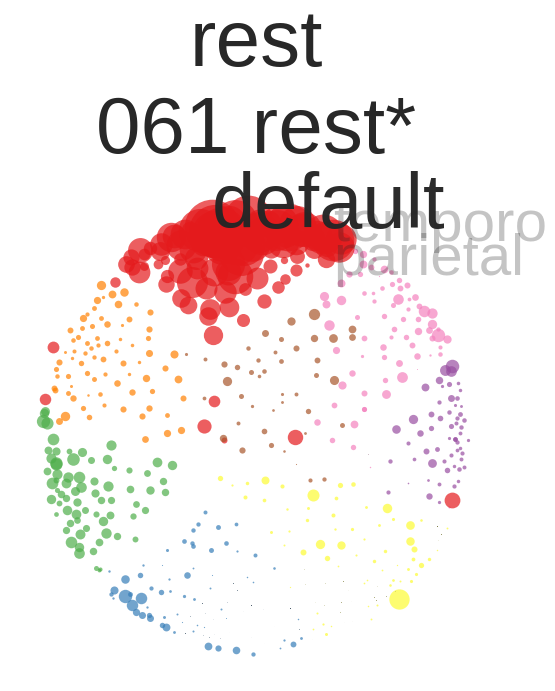

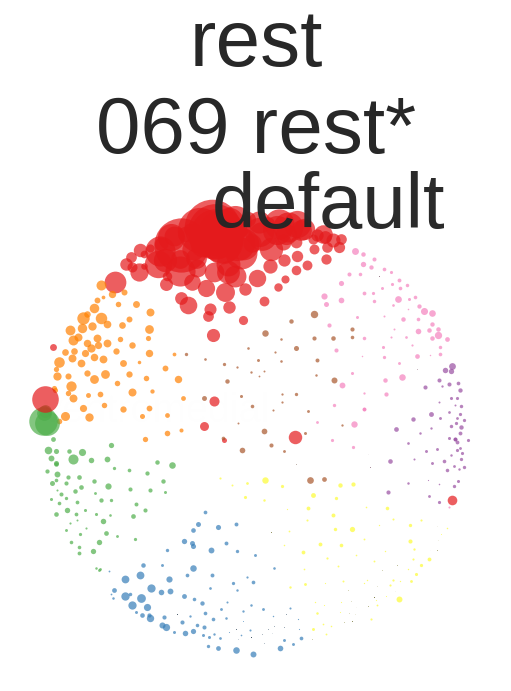

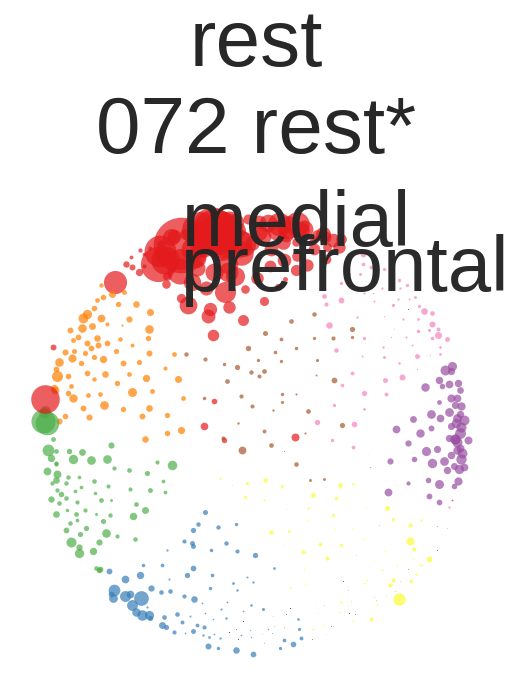

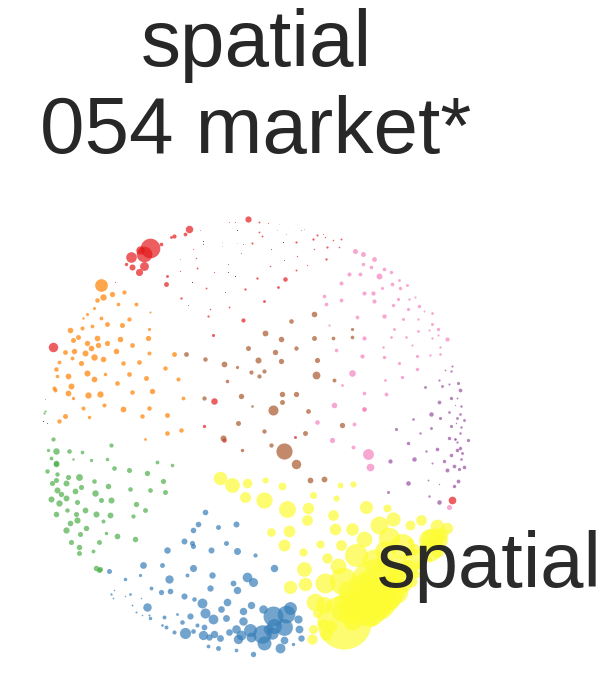

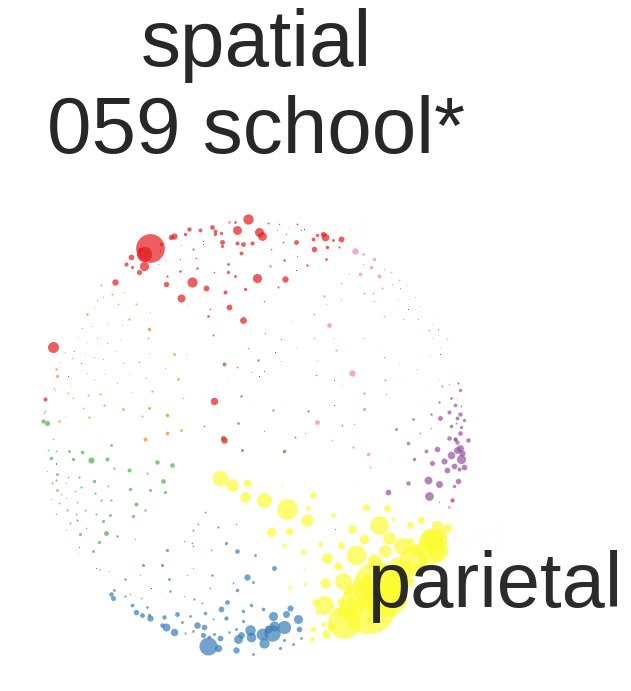

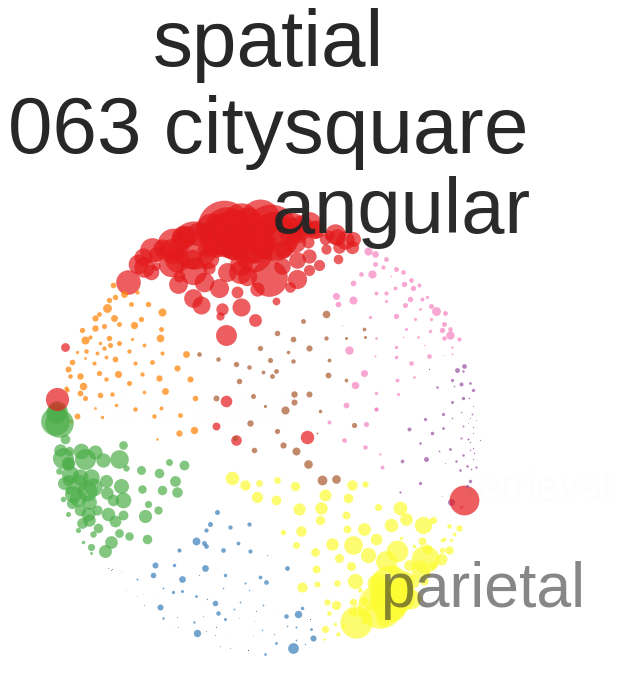

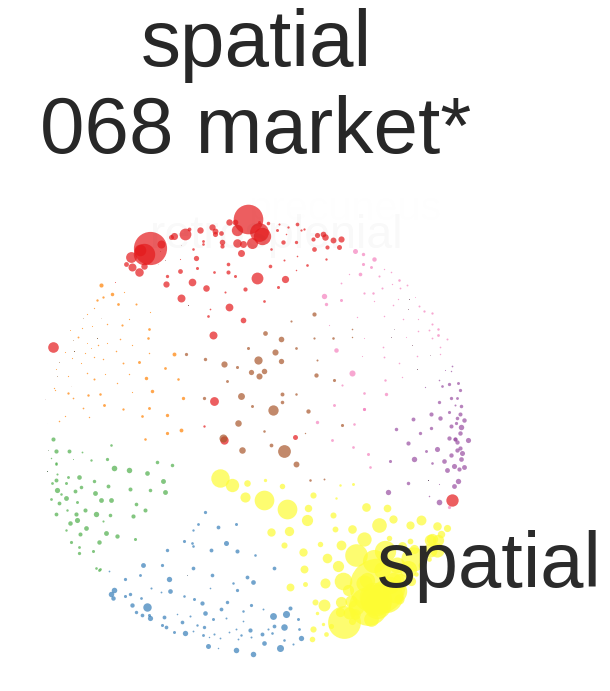

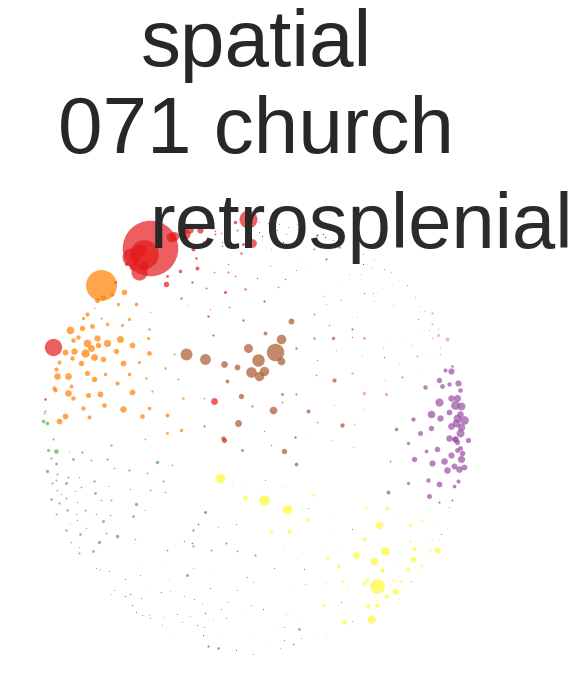

In [58]:
for i in sortRunDf.index:
    thisBlock = sortRunDf.ix[i]['filename']
    # put an asterisk behind the name of every block that was predicted correctly
    thisEval = ['','*'][ decodeDf.loc[i]['eval'] ]
    makeMindSpace(thisBlock,myEval=thisEval)

In [59]:
ballList = ['../nsFigs/%s'%x for x in os.listdir('../nsFigs/') if x.startswith('synth')\
            and '_00' not in x and 'meanCond' not in x and 'pFgA' not in x]
ballList.sort()

In [60]:
ballList

['../nsFigs/synth_faces_051_movieactors.png',
 '../nsFigs/synth_faces_058_athletes.png',
 '../nsFigs/synth_faces_064_family.png',
 '../nsFigs/synth_faces_067_friends.png',
 '../nsFigs/synth_faces_074_politicians.png',
 '../nsFigs/synth_language_052_countries.png',
 '../nsFigs/synth_language_056_animals.png',
 '../nsFigs/synth_language_062_animals.png',
 '../nsFigs/synth_language_066_tools.png',
 '../nsFigs/synth_language_073_fruit.png',
 '../nsFigs/synth_motor_055_badminton.png',
 '../nsFigs/synth_motor_060_swimming.png',
 '../nsFigs/synth_motor_065_badminton.png',
 '../nsFigs/synth_motor_070_tennis.png',
 '../nsFigs/synth_motor_075_climbing.png',
 '../nsFigs/synth_rest_053_rest.png',
 '../nsFigs/synth_rest_057_rest.png',
 '../nsFigs/synth_rest_061_rest.png',
 '../nsFigs/synth_rest_069_rest.png',
 '../nsFigs/synth_rest_072_rest.png',
 '../nsFigs/synth_spatial_054_market.png',
 '../nsFigs/synth_spatial_059_school.png',
 '../nsFigs/synth_spatial_063_citysquare.png',
 '../nsFigs/synth_spa

In [61]:
# custom order
ballList = ballList[5:15]+ballList[-5:]+ballList[:5]+ballList[15:20]

In [62]:
ballList

['../nsFigs/synth_language_052_countries.png',
 '../nsFigs/synth_language_056_animals.png',
 '../nsFigs/synth_language_062_animals.png',
 '../nsFigs/synth_language_066_tools.png',
 '../nsFigs/synth_language_073_fruit.png',
 '../nsFigs/synth_motor_055_badminton.png',
 '../nsFigs/synth_motor_060_swimming.png',
 '../nsFigs/synth_motor_065_badminton.png',
 '../nsFigs/synth_motor_070_tennis.png',
 '../nsFigs/synth_motor_075_climbing.png',
 '../nsFigs/synth_spatial_054_market.png',
 '../nsFigs/synth_spatial_059_school.png',
 '../nsFigs/synth_spatial_063_citysquare.png',
 '../nsFigs/synth_spatial_068_market.png',
 '../nsFigs/synth_spatial_071_church.png',
 '../nsFigs/synth_faces_051_movieactors.png',
 '../nsFigs/synth_faces_058_athletes.png',
 '../nsFigs/synth_faces_064_family.png',
 '../nsFigs/synth_faces_067_friends.png',
 '../nsFigs/synth_faces_074_politicians.png',
 '../nsFigs/synth_rest_053_rest.png',
 '../nsFigs/synth_rest_057_rest.png',
 '../nsFigs/synth_rest_061_rest.png',
 '../nsFigs

### make a large figure

In [63]:
a = []
for i in ballList:
    im = Image.open(i)
    thisAspect = im.getbbox()
    a.append(thisAspect)
    
maxSize = tuple( pd.DataFrame(a).max()[2:] )
maxSize

(2844, 2622)

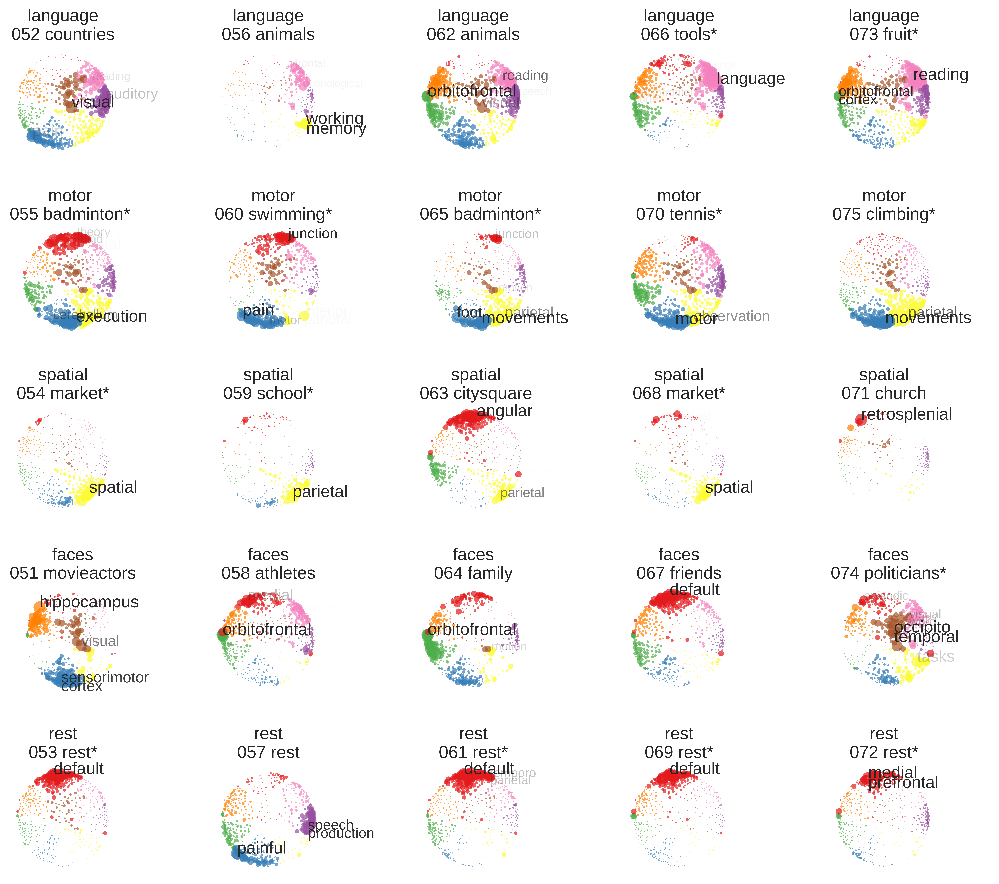

In [64]:
fig = plt.figure(figsize=(16,14))
for i,im in enumerate(ballList):
    ax = plt.subplot(5,5,i+1)
    
    mask = Image.new('RGBA', maxSize,color=(255,255,255))
    mask.paste(Image.open(im),(0,0))
    ax.imshow( mask )
    ax.set_xticks([]);ax.set_yticks([])
    sns.despine(left=True,bottom=True)
plt.savefig('../nsFigs/fig9_nsSpacesTest.png',dpi=600,bbox_inches='tight')
plt.show()

### for the secret blocks

['primary motor', 'primary', 'sensorimotor', 'motor cortex', 'ipsilateral', 'somatosensory', 'sensorimotor cortex', 'somatosensory cortex', 'contralateral', 'movement']


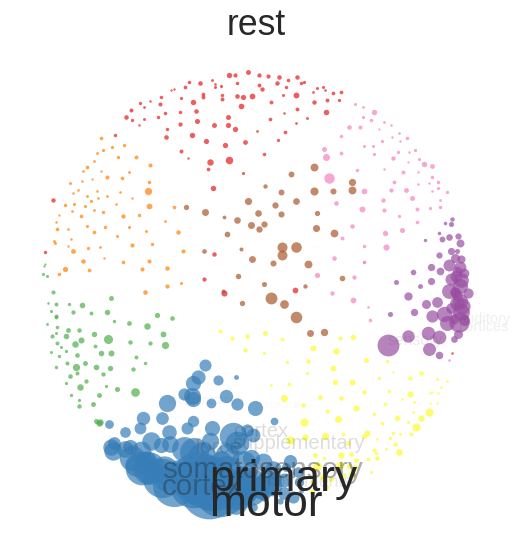

['frontal', '47', 'orbitofrontal cortex', 'retrieval', 'frontal gyrus', 'nouns', 'orbitofrontal', 'ratings', 'neutral', 'emotions']


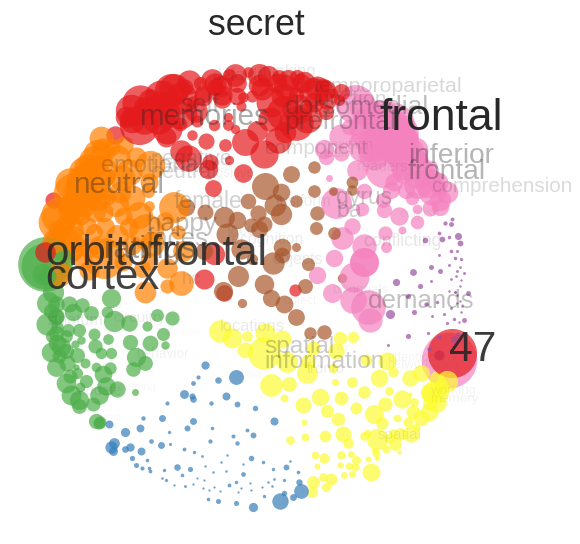

In [65]:
for im in ['../outofsample/%s'%x for x in os.listdir('../outofsample/')]:
    makeMeanMindSpace(im,closest=100)